### Importing libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
india_cc = pd.read_csv("Credit card transactions - India - Simple.csv")
india_cc.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [3]:
india_cc.shape

(26052, 7)

- checking for missing data

In [29]:
india_cc.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

- confirming column dtypes

In [30]:
india_cc.dtypes

index         int64
City         object
Date         object
Card Type    object
Exp Type     object
Gender       object
Amount        int64
dtype: object

- converting Date column to datetime type

In [31]:
india_cc['Date'] = pd.to_datetime(india_cc['Date'])
india_cc.dtypes

index                 int64
City                 object
Date         datetime64[ns]
Card Type            object
Exp Type             object
Gender               object
Amount                int64
dtype: object

In [32]:
india_cc['Card Type'].unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

- removing excess texts from the city column

In [33]:
india_cc['City'] = india_cc['City'].str.replace(', India', '')
india_cc['City'].head(10)

0             Delhi
1    Greater Mumbai
2         Bengaluru
3    Greater Mumbai
4         Bengaluru
5             Delhi
6             Delhi
7    Greater Mumbai
8             Delhi
9             Delhi
Name: City, dtype: object

In [34]:
india_cc.sort_values('Amount', ascending= False).head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
80,80,Greater Mumbai,2014-10-14,Platinum,Bills,F,998077
134,134,Delhi,2013-10-27,Gold,Bills,F,996754
254,254,Ahmedabad,2015-04-17,Gold,Bills,F,996291
183,183,Ahmedabad,2014-08-27,Platinum,Bills,F,995634
330,330,Delhi,2014-06-07,Signature,Bills,F,994537
343,343,Greater Mumbai,2014-09-06,Signature,Bills,F,994184
68,68,Greater Mumbai,2014-03-22,Gold,Bills,F,991685
141,141,Greater Mumbai,2013-10-04,Gold,Bills,F,990700
28,28,Bengaluru,2015-01-18,Platinum,Bills,F,987935
17,17,Greater Mumbai,2015-03-30,Gold,Bills,F,986379


In [35]:
india_cc.groupby('Card Type').sum('Amount')

,index,Amount
Card Type,,
Gold,84215576,984539536
Platinum,84629921,1007639019
Signature,86169052,1013041105
Silver,84325777,1069613713


In [40]:
india_cc.groupby('Gender')['Amount'].sum()

Gender
F    2205311030
M    1869522343
Name: Amount, dtype: int64

In [51]:
amount_by_date = india_cc.groupby('Date')['Amount'].sum()

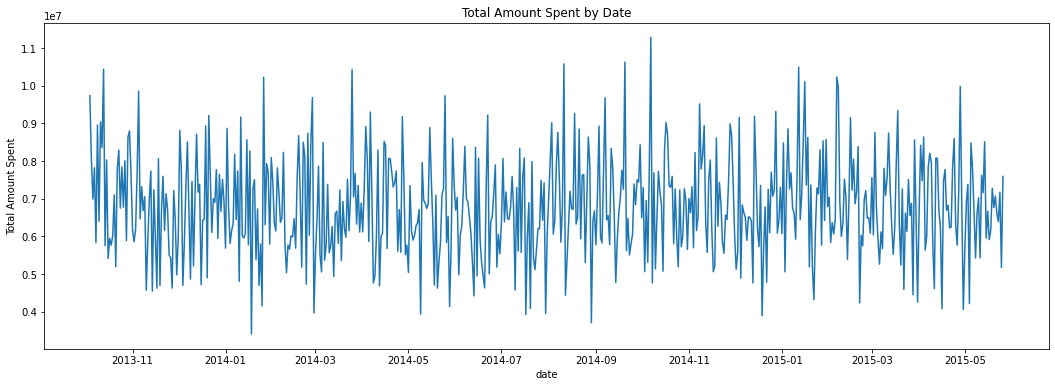

In [56]:
plt.figure(figsize = (18,6))
plt.plot(amount_by_date.index, amount_by_date.values)
plt.xlabel('date')
plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Date')
plt.show()

- avg & max amount  of transactions per gender 

In [38]:
india_cc.groupby('Gender')['Amount'].mean()

Gender
F    161206.946637
M    151109.145086
Name: Amount, dtype: float64

In [42]:
india_cc.groupby('Gender')['Amount'].max()

Gender
F    998077
M    299981
Name: Amount, dtype: int64